In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score , roc_curve
from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [5]:
#ProfileReport(df)

In [6]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [7]:
#ProfileReport(df)

In [8]:
x = df.drop(columns='quality')
y = df.quality
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.25, random_state=300)

In [9]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.25, random_state=300)

In [10]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

In [12]:
sklearn.__version__

'0.24.2'

In [13]:
df1 = df.head(500)
x1 = df1.drop(columns='quality')
y1 = df1.quality

In [14]:
dt_model_1 = DecisionTreeClassifier()
dt_model_1.fit(x1,y1)

DecisionTreeClassifier()

[Text(488.5710871104816, 1055.2235294117647, 'alcohol <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]\nclass = 5'),
 Text(301.26203966005664, 991.2705882352941, 'total sulfur dioxide <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]\nclass = 5'),
 Text(187.31728045325778, 927.3176470588236, 'citric acid <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]\nclass = 5'),
 Text(87.9943342776204, 863.364705882353, 'alcohol <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]\nclass = 5'),
 Text(33.72237960339943, 799.4117647058824, 'sulphates <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]\nclass = 6'),
 Text(25.291784702549574, 735.4588235294118, 'volatile acidity <= 0.605\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]\nclass = 4'),
 Text(16.861189801699716, 671.5058823529412, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]\nclass = 4'),
 Text(33.72237960339943, 671.5058823529412, 'gini = 0

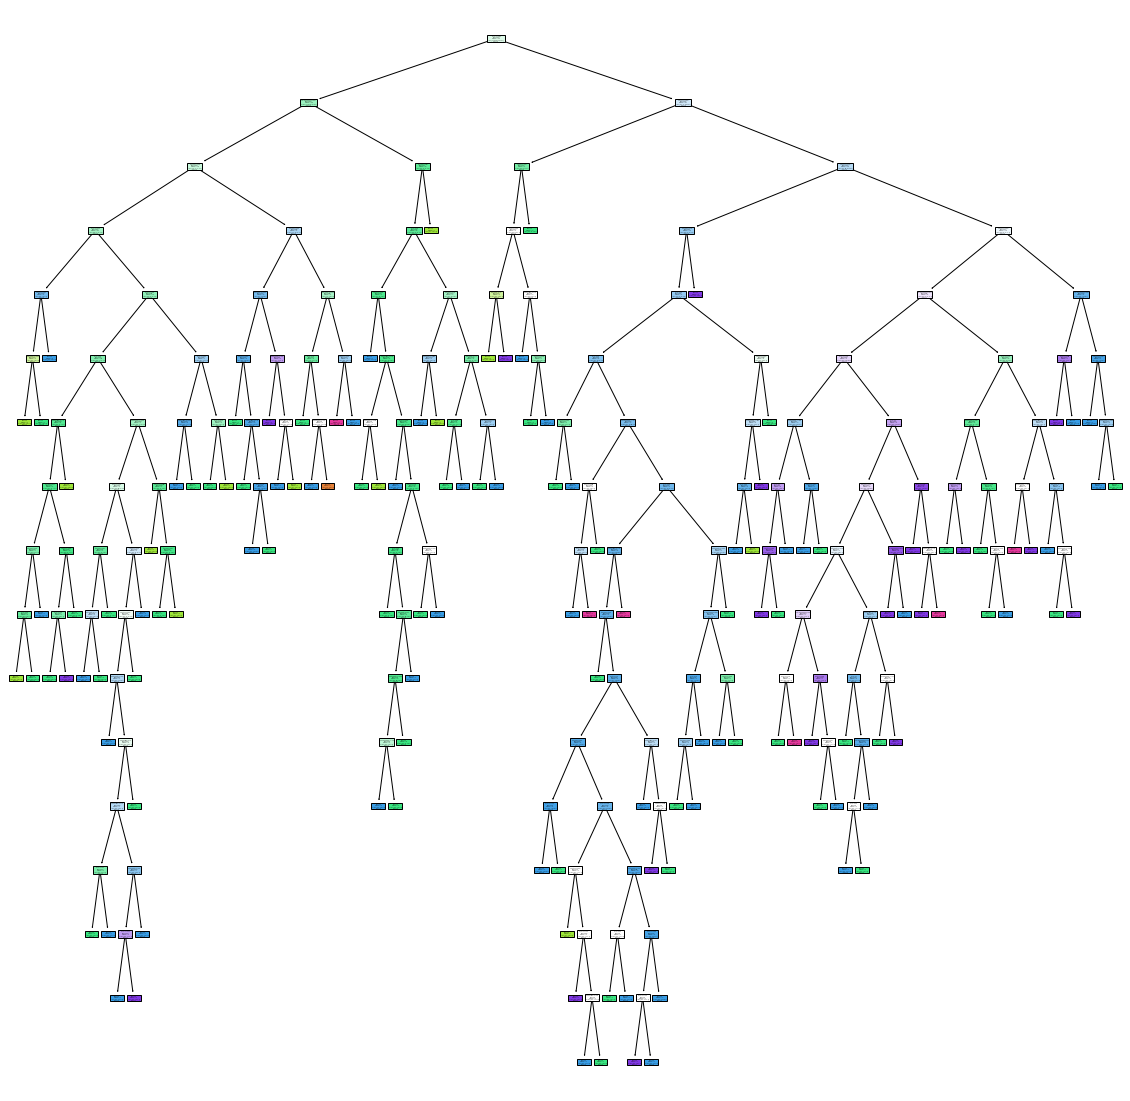

In [16]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_1,filled=True, class_names=[str(i) for i in set(y1)], feature_names = x1.columns)

plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_1, filled =True, class_names = [str(i)for i in set(y1)], feature_names = x1.columns)

In [80]:
dt_model_1.predict(x1)
dt_model_1.score(x1,y1)

1.0

In [81]:
dt_model_1.score(x_test,y_test)

0.585

In [82]:
path = dt_model_1.cost_complexity_pruning_path(x1,y1)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.00175   , 0.00181818, 0.00184615, 0.00185   ,
       0.00188235, 0.00192308, 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.00247552, 0.00261111, 0.00262769, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00272222, 0.00283333, 0.003     ,
       0.003     , 0.003     , 0.003     , 0.00304762, 0.00305051,
       0.00308418, 0.00328205, 0.00333333, 0.00333333, 0.00334032,
       0.00336606, 0.00342857, 0.00343316, 0.0035    , 0.0035    ,
       0.0036    , 0.00363636, 0.00373333, 0.00373809, 0.0038    ,
       0.0038237 , 0.004     , 0.00404444, 0.00428571, 0.00437662,
       0.00462338, 0.00465709, 0.00466667, 0.0048    , 0.00495726,
       0.00504242, 0.00508235, 0.00509091, 0.00510606, 0.00516667,
       0.00568485, 0.00589394, 0.00656364, 0.00671079, 0.0067591 ,
       0.00688352, 0.00688889, 0.007     , 0.00701299, 0.00706

In [83]:
dt_model_2 = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model_2.append(dt_m)

Text(0, 0.5, 'score')

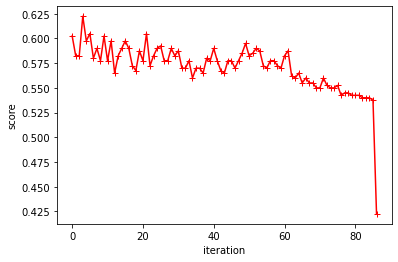

In [84]:
dt_model_2 = []
score = []
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=i)
    dt_m.fit(x1,y1)
    dt_model_2.append(dt_m)
    score.append(dt_m.score(x_test,y_test))
    
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [85]:
train_score = [i.score(x1,y1) for i in dt_model_2]

In [86]:
test_score = [i.score(x_test,y_test) for i in dt_model_2]

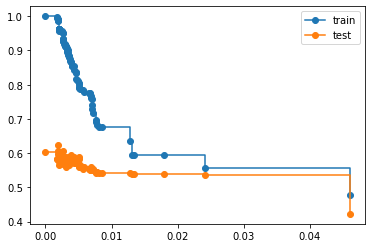

In [87]:
fig, ax = plt.subplots()
ax.set_xlabel = ('alpha')
ax.set_ylabel = ('Accuracy')
ax.set_title = ('Accuracy vs alpha for training and test sets')
ax.plot(ccp_alpha, train_score, marker = 'o', label = 'train', drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker = 'o', label = 'test',drawstyle="steps-post")
ax.legend()
plt.show()

In [88]:
dt_model_ccp = DecisionTreeClassifier(ccp_alpha=0.14)
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.14)

In [89]:
dt_model_ccp.score(x1,y1)

0.478

In [90]:
grid_param = {"criterion" : ['gini', 'entropy'],
              "splitter": ['best', 'random'],
              "max_depth" : range(2,40,1),
              "min_samples_split": range(2,10,1),
              "min_samples_leaf": range(1,10,1)
}

In [91]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp, param_grid=grid_param, cv=10,n_jobs=-1)

grid_ccp.fit(x1,y1)

In [92]:
#grid_ccp.best_params_

In [93]:
dt_ccp_new = DecisionTreeClassifier(
criterion = 'entropy', max_depth=17, min_samples_leaf=1, min_samples_split=3, splitter='random', ccp_alpha=0.014)

In [94]:
dt_ccp_new.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, criterion='entropy', max_depth=17,
                       min_samples_split=3, splitter='random')

In [95]:
dt_ccp_new.score(x1,y1)

0.646

In [96]:
dt_ccp_new.score(x_test,y_test)

0.5725

In [97]:
pred = dt_ccp_new.predict(x_train)

In [98]:
confusion_matrix(y_train,pred)

array([[  0,   0,   5,   0,   0,   0],
       [  0,   4,  23,  14,   0,   0],
       [  0,   0, 346, 166,   0,   0],
       [  0,   1, 110, 376,   0,   0],
       [  0,   1,  15, 123,   0,   0],
       [  0,   1,   1,  13,   0,   0]], dtype=int64)

# Bagging

In [99]:
df = pd.read_csv('winequality-red.csv')

In [100]:
x = df.drop(columns='quality')
y = df.quality
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.25, random_state=300)

In [101]:
from sklearn.ensemble import BaggingClassifier

In [102]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)

In [103]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [104]:
bag_dt.predict(x_test)

array([5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 4, 6, 5, 7,
       5, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5,
       6, 5, 5, 6, 6, 6, 6, 5, 7, 5, 5, 6, 7, 5, 6, 6, 6, 6, 6, 7, 6, 6,
       7, 5, 5, 6, 6, 5, 6, 7, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5,
       6, 5, 6, 5, 5, 6, 5, 5, 7, 6, 5, 5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 7,
       5, 5, 5, 5, 5, 6, 7, 5, 6, 6, 6, 5, 6, 6, 6, 7, 6, 5, 6, 6, 5, 5,
       5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 7, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 7, 6, 7, 6, 6, 6, 6, 7,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 5, 5, 7, 7, 5, 6, 6, 5, 5, 6, 7, 5, 5, 6, 6, 7, 5, 6,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5,
       5, 6, 7, 5, 5, 5, 5, 5, 7, 5, 6, 6, 5, 6, 6, 6, 6, 7, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 4, 5, 6, 5, 6, 6, 5, 5, 6, 5, 7, 7, 5, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5, 6, 5,

In [105]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [106]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [107]:
bag_dt.estimator_params

()

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
bag_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)

In [110]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [111]:
bag_knn.predict(x_test)

array([6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 7, 6, 6, 5, 5, 5, 6,
       5, 5, 6, 6, 6, 5, 7, 5, 5, 7, 6, 5, 6, 5, 5, 5, 4, 5, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 5, 7, 4, 7, 6, 6, 5, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 7, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 5, 5, 7, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6,
       6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 6,
       6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5,
       6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 7, 6, 5, 6, 6,
       6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 8, 5, 5, 5, 6, 5, 5,
       4, 5, 6, 5, 5, 5, 6, 5, 7, 6, 5, 5, 6, 6, 5,

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf = RandomForestClassifier(n_estimators=100)

In [114]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [115]:
rf.score(x_test,y_test)

0.6575

In [116]:
bag_dt.score(x_test,y_test)

0.6825

In [117]:
bag_knn.score(x_test,y_test)

0.4975

In [118]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1073388283)

In [119]:
grid_param = {
    "n_estimators" : [5,10,50,100,120,150],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(10),
    'min_samples_leaf': range(10)
}

In [120]:
rf = RandomForestClassifier(n_estimators=5)

In [121]:
grid_search_rf = GridSearchCV(param_grid=grid_param,cv=10, n_jobs=6, verbose =1, estimator =rf )

In [ ]:
grid_search_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\RAKSHANDA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [ ]:
grid_search_rf.best_params_

In [ ]:
rf_new = RandomForestClassifier(criterion='entropy', max_depth = 9, min_samples_leaf=1, n_estimators= 120)

In [65]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=120)

In [66]:
rf_new.score(x_test,y_test)

0.66